In [1]:
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
print("Features:\n",data.columns)
dialects = ["Bandari", "Gilaki","Kurdish","Lori","Turkish"]
print("\nData Size:",data.shape)

Features:
 Index(['mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean',
       'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std',
       'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean',
       'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std',
       'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean',
       'mfcc13_std', 'zcr_mean', 'zcr_std', 'chroma_stft_mean',
       'chroma_stft_std', 'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_rolloff_mean', 'spectral_rolloff_std',
       'spectral_contrast_mean', 'spectral_contrast_std',
       'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'Dialect'],
      dtype='object')

Data Size: (1373, 39)


In [3]:
data[:5].style

## Train-Test split / No feature selection and reduction

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np 

data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)

train, test = train_test_split(dataset, test_size = 0.2, random_state=2, stratify=dataset[:,-1])
    
train_x = train[:,:-1]
train_y = train[:,-1]

test_x = test[:,:-1]
test_y = test[:,-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

## K-Nearest Neighbor

Best K is 1 with the accuarcy 0.48072727272727267


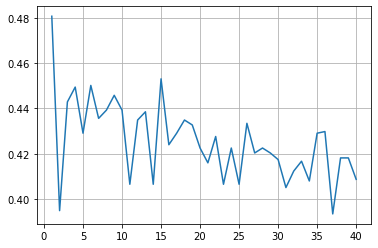



KFold on the best K:
Fold 1
Training Score: 1.000
Test score: 0.404

Confusion matrix:
[[22  8  5  6 14]
 [ 3 25  3 14  8]
 [13  3 22 10  8]
 [ 6  8  9 22  9]
 [ 9  9 13  6 20]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.42      0.40      0.41        55
      Gilaki       0.47      0.47      0.47        53
     Kurdish       0.42      0.39      0.41        56
        Lori       0.38      0.41      0.39        54
     Turkish       0.34      0.35      0.34        57

    accuracy                           0.40       275
   macro avg       0.41      0.40      0.40       275
weighted avg       0.40      0.40      0.40       275

Fold 2
Training Score: 1.000
Test score: 0.491

Confusion matrix:
[[26  4  5  9 11]
 [ 6 25  6 12  4]
 [10  4 26 11  5]
 [ 6  7  4 29  8]
 [ 7  8  6  7 29]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.47      0.47      0.47        55
      Gilaki     

In [55]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)

knn_score = []
kfold = 5
K = 40

for i in range(1,K+1):
    results_knn = []   
    for fold in range(kfold): 
        train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        knn = KNeighborsClassifier(n_neighbors=i, p=2)
        knn.fit(train_x,train_y)
        results_knn.append(knn.score(test_x,test_y))
    knn_score.append(np.mean(results_knn))
print("Best K is "+str(np.argmax(knn_score)+1)+" with the accuarcy "+str(np.max(knn_score)))
plt.plot(np.linspace(1,K,K), knn_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN hyperparameter selection")
plt.grid()
plt.savefig("knn")
plt.show()

print("\n\nKFold on the best K:")
best_K = np.argmax(knn_score)+1    
results_knn = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    knn = KNeighborsClassifier(n_neighbors=best_K, p=2)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
    print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

    y_pred = knn.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best K: "+str(np.mean(results_knn)))    

## Gradient Boosting

The best learning rate: 0.25


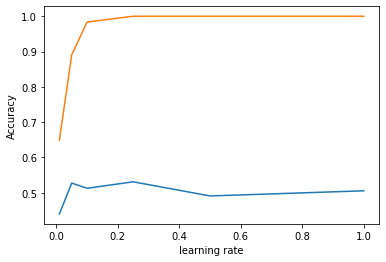

In [42]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)

train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]
    
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(train_x, train_y)
   train_pred = model.predict(train_x)
   y_pred = model.predict(test_x)
   test_results.append(model.score(test_x,test_y))
   train_results.append(model.score(train_x, train_y))

    
print("The best learning rate:",learning_rates[np.argmax(test_results)])
    
plt.plot(learning_rates, test_results)
plt.plot(learning_rates, train_results)
plt.ylabel('Accuracy')
plt.xlabel('learning rate')
plt.savefig('GradientBoostingClassifier learning rate')
plt.show()

The best n_estimators: 100


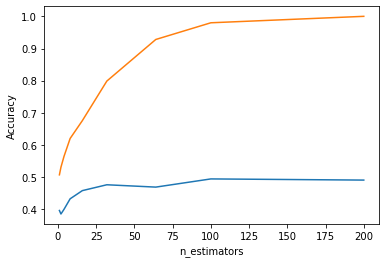

In [43]:
train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(train_x, train_y)
   train_pred = model.predict(train_x)
   y_pred = model.predict(test_x)
   test_results.append(model.score(test_x,test_y))
   train_results.append(model.score(train_x, train_y))

print("The best n_estimators:",n_estimators[np.argmax(test_results)])
    
plt.plot(n_estimators, test_results)
plt.plot(n_estimators, train_results)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.savefig('GradientBoostingClassifier n_estimators')
plt.show()

The best max_depths: 7.0


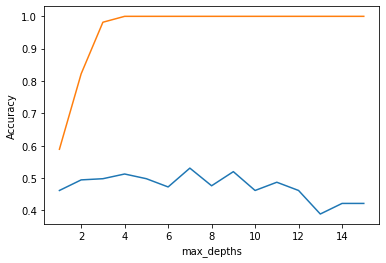

In [44]:
train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(train_x, train_y)
   train_pred = model.predict(train_x)
   y_pred = model.predict(test_x)
   test_results.append(model.score(test_x,test_y))
   train_results.append(model.score(train_x, train_y))

print("The best max_depths:",max_depths[np.argmax(test_results)])

plt.plot(max_depths, test_results)
plt.plot(max_depths, train_results)
plt.ylabel('Accuracy')
plt.xlabel('max_depths')
plt.savefig('GradientBoostingClassifier max_depths')
plt.show()

In [45]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)

gradientBoosting_score = []
kfold = 5
for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]
    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=7).fit(train_x, train_y)
    gradientBoosting_score.append(clf.score(test_x, test_y))
    y_pred = clf.predict(test_x)
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("Average test score:",np.mean(gradientBoosting_score))   



Fold 1

Confusion matrix:
[[32  3  5  7  8]
 [ 8 27  5 10  3]
 [ 8  8 25  8  7]
 [ 3  7 10 29  5]
 [ 8  4 11  6 28]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.54      0.58      0.56        55
      Gilaki       0.55      0.51      0.53        53
     Kurdish       0.45      0.45      0.45        56
        Lori       0.48      0.54      0.51        54
     Turkish       0.55      0.49      0.52        57

    accuracy                           0.51       275
   macro avg       0.51      0.51      0.51       275
weighted avg       0.51      0.51      0.51       275



Fold 2

Confusion matrix:
[[27  3  7  6 12]
 [ 3 28  4  9  9]
 [ 4 10 31  5  6]
 [ 2  4 11 29  8]
 [ 6  6  5  8 32]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.64      0.49      0.56        55
      Gilaki       0.55      0.53      0.54        53
     Kurdish       0.53      0.55      0.54        56
        

## Random Forest

Best n_estimators is 234 with the accuarcy 0.5578181818181818


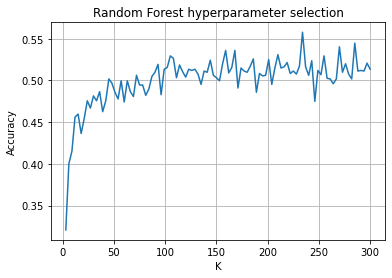



KFold on the best n:
Fold 1
Training Score: 1.000
Test score: 0.509

Confusion matrix:
[[38  0  6  4  7]
 [ 5 25  8  9  6]
 [13  3 24  5 11]
 [ 7  5  6 26 10]
 [ 9  9  5  7 27]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.53      0.69      0.60        55
      Gilaki       0.60      0.47      0.53        53
     Kurdish       0.49      0.43      0.46        56
        Lori       0.51      0.48      0.50        54
     Turkish       0.44      0.47      0.46        57

    accuracy                           0.51       275
   macro avg       0.51      0.51      0.51       275
weighted avg       0.51      0.51      0.51       275

Fold 2
Training Score: 1.000
Test score: 0.538

Confusion matrix:
[[39  1  3  2 10]
 [ 2 25  2 11 13]
 [ 8  9 25  5  9]
 [ 5  2  8 32  7]
 [14  3  4  9 27]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.57      0.71      0.63        55
      Gilaki     

In [81]:
forest_score = []
kfold = 5
max_estimators = 300
est_range = np.linspace(3,max_estimators,int(max_estimators/3),endpoint=True)

for i in est_range:
    i = int(i)
    results_forest=[]    
    for fold in range(kfold): 
        train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        forest=RandomForestClassifier(n_estimators=i)
        forest.fit(train_x,train_y)
        results_forest.append(forest.score(test_x,test_y))
    forest_score.append(np.mean(results_forest))
    
print("Best n_estimators is "+str(np.argmax(forest_score)*3+3)+" with the accuarcy "+str(np.max(forest_score)))
plt.plot(est_range, forest_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Random Forest hyperparameter selection")
plt.grid()
plt.savefig("randomForest")
plt.show()        
        
kfold = 5    
print("\n\nKFold on the best n:")
best_n = np.argmax(forest_score)*3+3 
results_forest = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    forest=RandomForestClassifier(n_estimators=best_n)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
    print("Test score: {:.3f}".format(forest.score(test_x,test_y)))  

    y_pred = forest.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best n: "+str(np.mean(results_forest)))        

## Support Vector Machine

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.linspace(0, 12, 50, endpoint=True),
              'gamma': np.linspace(0.4, 1, 50, endpoint=True),
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(train_x, train_y)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.42448979591

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 5/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 1/5] END ....C=0.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 4/5] END ....C=0.0, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 4/5] END ....C=0.0, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 3/5] END ....C=0.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 1/5] END .....C=0.0, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=0.0, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=0.0, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=0.0, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=0.0, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 4/5] END ....C=0.0, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=0.24489795

[CV 5/5] END C=0.24489795918367346, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.1s
[CV 2/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.1s
[CV 3/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.1s
[CV 5/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=r

[CV 5/5] END C=0.24489795918367346, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=r

[CV 5/5] END C=0.4897959183673469, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; to

[CV 5/5] END C=0.4897959183673469, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total t

[CV 2/5] END C=0.4897959183673469, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 2/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 4/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 5/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total tim

[CV 4/5] END C=0.7346938775510203, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; 

[CV 3/5] END C=0.7346938775510203, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 4/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 2/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total t

[CV 4/5] END C=0.7346938775510203, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time= 

[CV 2/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total t

[CV 2/5] END C=0.9795918367346939, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total t

[CV 2/5] END C=0.9795918367346939, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 3/5] END C=1.2244897959183674, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total t

[CV 4/5] END C=1.2244897959183674, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.2s
[CV 1/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total t

[CV 1/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; to

[CV 1/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.6693877551020408, kernel=rbf; total t

[CV 2/5] END C=1.4693877551020407, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total tim

[CV 3/5] END C=1.7142857142857142, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf;

[CV 2/5] END C=1.7142857142857142, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 1/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 3/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 2/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total t

[CV 3/5] END C=1.7142857142857142, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.1s
[CV 1/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time= 

[CV 4/5] END C=1.9591836734693877, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total t

[CV 5/5] END C=1.9591836734693877, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total t

[CV 1/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.204081632653061, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s

[CV 5/5] END C=2.204081632653061, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.4489795918367347, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; to

[CV 2/5] END C=2.4489795918367347, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total t

[CV 3/5] END C=2.4489795918367347, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.1s
[CV 2/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time

[CV 4/5] END C=2.693877551020408, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=

[CV 4/5] END C=2.693877551020408, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s

[CV 5/5] END C=2.693877551020408, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 

[CV 2/5] END C=2.9387755102040813, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total t

[CV 3/5] END C=2.9387755102040813, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.1s
[CV 3/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total t

[CV 3/5] END C=2.9387755102040813, gamma=0.9755102040816327, kernel=rbf; total time=   0.2s
[CV 4/5] END C=2.9387755102040813, gamma=0.9755102040816327, kernel=rbf; total time=   0.1s
[CV 5/5] END C=2.9387755102040813, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=2.

[CV 5/5] END C=3.183673469387755, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s

[CV 1/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 3/5] END C=3.4285714285714284, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; to

[CV 2/5] END C=3.4285714285714284, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total t

[CV 3/5] END C=3.4285714285714284, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time

[CV 4/5] END C=3.673469387755102, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=

[CV 4/5] END C=3.673469387755102, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s

[CV 5/5] END C=3.673469387755102, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 

[CV 1/5] END C=3.9183673469387754, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total t

[CV 2/5] END C=3.9183673469387754, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total t

[CV 3/5] END C=3.9183673469387754, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=3.

[CV 5/5] END C=4.163265306122449, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s

[CV 1/5] END C=4.163265306122449, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 3/5] END C=4.408163265306122, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=  

[CV 4/5] END C=4.408163265306122, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.6571428571428571, kernel=rbf; total time=   0.1s
[CV 5/5] END C=4.408163265306122, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.1s
[CV 2/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s

[CV 1/5] END C=4.408163265306122, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 3/5] END C=4.408163265306122, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 5/5] END C=4.408163265306122, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 

[CV 4/5] END C=4.653061224489796, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.

[CV 5/5] END C=4.653061224489796, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 3/5] END C=4.653061224489796, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 4/5] END C=4.653061224489796, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.1s
[CV 5/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.1s

[CV 1/5] END C=4.653061224489796, gamma=0.9387755102040817, kernel=rbf; total time=   0.1s
[CV 2/5] END C=4.653061224489796, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s


[CV 3/5] END C=4.8979591836734695, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total t

[CV 3/5] END C=4.8979591836734695, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total t

[CV 3/5] END C=4.8979591836734695, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.8979591836734695, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.8979591836734695, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=4.8979591836734695, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.8979591836734695, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.8979591836734695, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   

[CV 5/5] END C=5.142857142857142, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 2/5] END C=5.142857142857142, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s

[CV 4/5] END C=5.387755102040816, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.43673469387755104, kernel=rbf; total time=   0.1s
[CV 1/5] END C=5.387755102040816, gamma=0.4489795918367347, kernel=rbf; total time=   0.1s
[CV 2/5] END C=5.387755102040816, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.

[CV 5/5] END C=5.387755102040816, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s

[CV 2/5] END C=5.387755102040816, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV

[CV 4/5] END C=5.63265306122449, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] E

[CV 2/5] END C=5.63265306122449, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 4/5] END C=5.63265306122449, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=

[CV 1/5] END C=5.877551020408163, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s

[CV 3/5] END C=5.877551020408163, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.8040816326530612, kernel=rbf; total time=   0.1s
[CV 5/5] END C=5.877551020408163, gamma=0.8040816326530612, kernel=rbf; total time=   0.1s
[CV 1/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.1s

[CV 1/5] END C=6.122448979591836, gamma=0.4122448979591837, kernel=rbf; total time=   0.1s
[CV 2/5] END C=6.122448979591836, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0

[CV 1/5] END C=6.122448979591836, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s

[CV 3/5] END C=6.122448979591836, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.36734693877551, gamma=0.4612244897959184, kernel=rbf; total time=   0.1s
[CV 1/5] END C=6.36734693877551, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s


[CV 1/5] END C=6.36734693877551, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 2/5] END C=6.36734693877551, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 3/5] END C=6.36734693877551, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 4/5] END C=6.36734693877551, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 5/5] END C=6.36734693877551, gamma=0.6938775510204082, kernel=rbf; total time=   0.1s
[CV 1/5] END C=6.36734693877551, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 2/5] END C=6.36734693877551, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 3/5] END C=6.36734693877551, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 4/5] END C=6.36734693877551, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 5/5] END C=6.36734693877551, gamma=0.7061224489795919, kernel=rbf; total time=   0.1s
[CV 1/5] END C=6.36734693877551, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 2/5] E

[CV 4/5] END C=6.36734693877551, gamma=0.9142857142857143, kernel=rbf; total time=   0.1s
[CV 5/5] END C=6.36734693877551, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.926530612244898, kernel=rbf; total time=   0.1s
[CV 2/5] END C=6.36734693877551, gamma=0.926530612244898, kernel=rbf; total time=   0.1s
[CV 3/5] END C=6.36734693877551, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.926530612244898, kernel=rbf; total time=   0.1s
[CV 5/5] END C=6.36734693877551, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.9387755102040817, kernel=rbf; total time=   0.1s
[CV 3/5] END C=6.36734693877551, gamma=0.9387755102040817, kernel=rbf; total time=   0.1s
[CV 4/5] END C=6.36734693877551, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=

[CV 1/5] END C=6.612244897959184, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s

[CV 3/5] END C=6.612244897959184, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.612244897959184, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=6.612244897959184, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=6.612244897959184, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=6.612244897959184, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=6.612244897959184, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=6.612244897959184, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=6.857142857142857, gamma=0.4,

[CV 1/5] END C=6.857142857142857, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 2/5] END C=6.857142857142857, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 5/5] END C=7.1020408163265305, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.4489795918367347, kernel=rbf; to

[CV 5/5] END C=7.1020408163265305, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.6693877551020408, kernel=rbf; total t

[CV 5/5] END C=7.1020408163265305, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 5/5] END C=7.1020408163265305, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.889795918367347, kernel=rbf; total time= 

[CV 1/5] END C=7.346938775510204, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.5102040816326531, kernel=rbf; total time=  

[CV 1/5] END C=7.346938775510204, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s

[CV 3/5] END C=7.346938775510204, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.9387755102040817, kernel=rbf; total time=   0.1s
[CV 2/5] END C=7.346938775510204, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[C

[CV 1/5] END C=7.591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s

[CV 3/5] END C=7.591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s

[CV 5/5] END C=7.591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=7.591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=7.591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=7.591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=7.591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=7.591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=7.836734693877551, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=7.836734693877551, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=7.836734693877551, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=7.836734693877551, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=7.836734693877551, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5]

[CV 2/5] END C=7.836734693877551, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s

[CV 4/5] END C=7.836734693877551, gamma=0.8285714285714285, kernel=rbf; total time=   0.1s
[CV 5/5] END C=7.836734693877551, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.8408163265306122, kernel=rbf; total time=   0.1s
[CV 4/5] END C=7.836734693877551, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.8408163265306122, kernel=rbf; total time=   0.1s
[CV 1/5] END C=7.836734693877551, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.8530612244897959, kernel=rbf; total time=   0.1s

[CV 1/5] END C=8.081632653061224, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.47346938775510206, kernel=rbf; total time=   0.0

[CV 2/5] END C=8.081632653061224, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.6693877551020408, kernel=rbf; total time=   0.1s
[CV 1/5] END C=8.081632653061224, gamma=0.6816326530612244, kernel=rbf; total time=   0.1s
[CV 2/5] END C=8.081632653061224, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s

[CV 4/5] END C=8.081632653061224, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 2/5] END C=8.081632653061224, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 1/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[

[CV 1/5] END C=8.326530612244898, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s

[CV 2/5] END C=8.326530612244898, gamma=0.7306122448979592, kernel=rbf; total time=   0.1s
[CV 3/5] END C=8.326530612244898, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s

[CV 4/5] END C=8.326530612244898, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 

[CV 2/5] END C=8.571428571428571, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s

[CV 4/5] END C=8.571428571428571, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s

[CV 2/5] END C=8.816326530612244, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.

[CV 3/5] END C=8.816326530612244, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s

[CV 5/5] END C=8.816326530612244, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s

[CV 2/5] END C=9.061224489795919, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total tim

[CV 2/5] END C=9.061224489795919, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.061224489795919, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 

[CV 2/5] END C=9.306122448979592, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.306122448979592, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s

[CV 1/5] END C=9.306122448979592, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.9877551020408163, kernel=rbf; total time=   0.1s
[CV 3/5] END C=9.306122448979592, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 2/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 5/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=9.551020408163264, gamma=0.4, kernel=rb

[CV 3/5] END C=9.551020408163264, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.1s
[CV 3/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 5/5] END C=9.551020408163264, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 2/5] END C=9.795918367346939, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   

[CV 2/5] END C=9.795918367346939, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.795918367346939, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 

[CV 1/5] END C=10.040816326530612, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total t

[CV 1/5] END C=10.040816326530612, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total t

[CV 1/5] END C=10.040816326530612, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total ti

[CV 3/5] END C=10.285714285714285, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total t

[CV 3/5] END C=10.285714285714285, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total t

[CV 3/5] END C=10.285714285714285, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.285714285714285, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=10.285714285714285, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=10.285714285714285, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=10.285714285714285, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 5/5] END ....C=10.285714285714285, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   

[CV 4/5] END C=10.53061224489796, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 1/5] END C=10.53061224489796, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s

[CV 4/5] END C=10.775510204081632, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.4489795918367347, kernel=rbf; total time=   0.1s
[CV 3/5] END C=10.775510204081632, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.4489795918367347, kernel=rbf; total time=   0.1s
[CV 5/5] END C=10.775510204081632, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.1s
[CV 2/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.1s
[CV 3/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total

[CV 4/5] END C=10.775510204081632, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total t

[CV 4/5] END C=10.775510204081632, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time= 

[CV 5/5] END C=11.020408163265305, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.4979591836734694, kernel=rbf; total time=   0.1s
[CV 1/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.1s
[CV 2/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.1s
[CV 4/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.1s
[CV 5/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total 

[CV 1/5] END C=11.020408163265305, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.7183673469387755, kernel=rbf; total time=   0.1s
[CV 4/5] END C=11.020408163265305, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.1s
[CV 1/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total t

[CV 1/5] END C=11.020408163265305, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.1s
[CV 3/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total ti

[CV 3/5] END C=11.26530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s

[CV 5/5] END C=11.26530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s

[CV 2/5] END .....C=11.26530612244898, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 3/5] END .....C=11.26530612244898, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 4/5] END .....C=11.26530612244898, gamma=1.0, kernel=rbf; total time=   0.1s
[CV 5/5] END .....C=11.26530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   

[CV 2/5] END C=11.510204081632653, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total t

[CV 2/5] END C=11.510204081632653, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.1s
[CV 2/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total t

[CV 3/5] END C=11.755102040816325, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; tota

[CV 2/5] END C=11.755102040816325, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.6571428571428571, kernel=rbf; total time=   0.1s
[CV 5/5] END C=11.755102040816325, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total t

[CV 2/5] END C=11.755102040816325, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s
[CV 1/5] END C=11.755102040816325, gamma=0.889795918367347, kernel=rbf; total time=   0.1s
[CV 2/5] END C=11.755102040816325, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.889795918367347, kernel=rbf; total time=   0.1s
[CV 1/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time= 

[CV 3/5] END ...C=12.0, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamm

[CV 5/5] END ...C=12.0, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamm

[CV 3/5] END ..................C=12.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=12.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=12.0, gamma=1.0, kernel=rbf; total time=   0.0s


Q:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.55646326 0.55919054 0.56010378]
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.        ,  0.24489796,  0.48979592,  0.73469388,  0.97959184,
        1.2244898 ,  1.46938776,  1.71428571,  1.95918367,  2.20408163,
        2.44897959,  2.69387755,  2.93877551,  3.18367347,  3.42857143,
        3.67346939,  3.91836735,  4.16326531,  4.40816327,  4.65306122,
        4.89795918,  5.14285714,  5.3877551 ,  5.63265306,  5.87755102,
        6.12244898,  6.36734694,  6.6122449 ,  6...
       0.64489796, 0.65714286, 0.66938776, 0.68163265, 0.69387755,
       0.70612245, 0.71836735, 0.73061224, 0.74285714, 0.75510204,
       0.76734694, 0.77959184, 0.79183673, 0.80408163, 0.81632653,
       0.82857143, 0.84081633, 0.85306122, 0.86530612, 0.87755102,
       0.88979592, 0.90204082, 0.91428571, 0.92653061, 0.93877551,
       0.95102041, 0.96326531, 0.9755102 , 0.9877551 , 1.        ]),
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 7.836734693877551, 'gamma': 0.7183673469387755, 'kernel': 'rbf'}
SVC(C=7.836734693877551, gamma=0.7183673469387755)
              precision    recall  f1-score   support

     Bandari       0.56      0.73      0.63        55
      Gilaki       0.55      0.51      0.53        53
     Kurdish       0.46      0.39      0.42        56
        Lori       0.39      0.37      0.38        54
     Turkish       0.50      0.49      0.50        57

    accuracy                           0.50       275
   macro avg       0.49      0.50      0.49       275
weighted avg       0.49      0.50      0.49       275

[[40  1  1  4  9]
 [ 8 27  7  5  6]
 [ 9  9 22 12  4]
 [ 6  8 11 20  9]
 [ 8  4  7 10 28]]
Training Score: 0.957
Test score: 0.498


In [86]:
svm_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

#     svm=SVC(C=7.836734693877551, gamma=0.7183673469387755)
    svm=SVC(C=11.620689655172413, gamma=0.6482758620689655)
    svm.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
    print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

    svm_score.append(svm.score(test_x,test_y))
    y_pred = svm.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
print("\nAverage test score:",np.mean(svm_score))     



Fold 1
Training Score: 0.962
Test score: 0.560
[[42  1  4  2  6]
 [ 5 30  6  6  6]
 [ 5  8 25  8 10]
 [ 7  3  9 23 12]
 [ 6  5  3  9 34]]
              precision    recall  f1-score   support

     Bandari       0.65      0.76      0.70        55
      Gilaki       0.64      0.57      0.60        53
     Kurdish       0.53      0.45      0.49        56
        Lori       0.48      0.43      0.45        54
     Turkish       0.50      0.60      0.54        57

    accuracy                           0.56       275
   macro avg       0.56      0.56      0.56       275
weighted avg       0.56      0.56      0.56       275



Fold 2
Training Score: 0.964
Test score: 0.538
[[37  7  7  3  1]
 [ 5 29  8  4  7]
 [ 2 13 28  7  6]
 [ 2  8  6 29  9]
 [ 7  8 11  6 25]]
              precision    recall  f1-score   support

     Bandari       0.70      0.67      0.69        55
      Gilaki       0.45      0.55      0.49        53
     Kurdish       0.47      0.50      0.48        56
        Lori  

## Multi-Layer Perceptron

In [90]:
neural_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    neural=MLPClassifier(activation='relu',max_iter=1000,hidden_layer_sizes=[100,100])
    neural.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
    print("Test score: {:.3f}".format(neural.score(test_x,test_y)))
    neural_score.append(neural.score(test_x,test_y))
    
    y_pred = neural.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    
print("The average accuracy: "+str(np.mean(neural_score)))        



Fold 1
Training Score: 1.000
Test score: 0.542
[[39  7  0  3  6]
 [ 7 24  8  7  7]
 [ 3 10 26 11  6]
 [ 7 11  7 25  4]
 [ 5  5  7  5 35]]
              precision    recall  f1-score   support

     Bandari       0.64      0.71      0.67        55
      Gilaki       0.42      0.45      0.44        53
     Kurdish       0.54      0.46      0.50        56
        Lori       0.49      0.46      0.48        54
     Turkish       0.60      0.61      0.61        57

    accuracy                           0.54       275
   macro avg       0.54      0.54      0.54       275
weighted avg       0.54      0.54      0.54       275



Fold 2
Training Score: 1.000
Test score: 0.520
[[31  5  6  5  8]
 [ 6 31  5  5  6]
 [ 6 11 25  7  7]
 [ 5  8  8 26  7]
 [ 5  6  9  7 30]]
              precision    recall  f1-score   support

     Bandari       0.58      0.56      0.57        55
      Gilaki       0.51      0.58      0.54        53
     Kurdish       0.47      0.45      0.46        56
        Lori  

## Working with PCA

## KNN with PCA

Best K is 12 with the accuarcy 0.44872727272727275


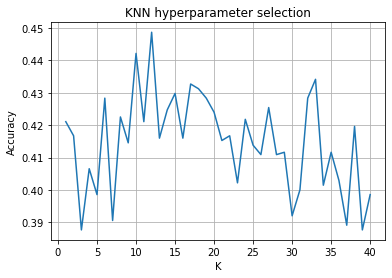



KFold on the best K:
Fold 1
Training Score: 0.534
Test score: 0.433

Confusion matrix:
[[33  5  7  5  5]
 [ 9 24  9  4  7]
 [ 8 11 18  9 10]
 [ 9  7  7 21 10]
 [16  5  8  5 23]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.44      0.60      0.51        55
      Gilaki       0.46      0.45      0.46        53
     Kurdish       0.37      0.32      0.34        56
        Lori       0.48      0.39      0.43        54
     Turkish       0.42      0.40      0.41        57

    accuracy                           0.43       275
   macro avg       0.43      0.43      0.43       275
weighted avg       0.43      0.43      0.43       275

Fold 2
Training Score: 0.531
Test score: 0.422

Confusion matrix:
[[31  7  4  3 10]
 [ 8 25  9  5  6]
 [14  7 21  5  9]
 [ 7  8 12 19  8]
 [16  5 12  4 20]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.41      0.56      0.47        55
      Gilaki     

In [29]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[:,:-1])
n_components = 14
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(scaled_data)
data_pca_2 = np.vstack((data_pca.T,dataset[:,-1])).T


knn_score = []
kfold = 5
K = 40

for i in range(1,K+1):
    results_knn = []   
    for fold in range(kfold): 
        train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        knn = KNeighborsClassifier(n_neighbors=i, p=2)
        knn.fit(train_x,train_y)
        results_knn.append(knn.score(test_x,test_y))
    knn_score.append(np.mean(results_knn))
print("Best K is "+str(np.argmax(knn_score)+1)+" with the accuarcy "+str(np.max(knn_score)))
plt.plot(np.linspace(1,K,K), knn_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN hyperparameter selection")
plt.grid()
plt.savefig("knn")
plt.show()

print("\n\nKFold on the best K:")
best_K = np.argmax(knn_score)+1    
results_knn = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    knn = KNeighborsClassifier(n_neighbors=best_K, p=2)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
    print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

    y_pred = knn.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best K: "+str(np.mean(results_knn)))    

## Gradient Boosting with PCA

In [23]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[:,:-1])
n_components = 14
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(scaled_data)
data_pca_2 = np.vstack((data_pca.T,dataset[:,-1])).T

gradientBoosting_score = []
kfold = 5
for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]
    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=10).fit(train_x, train_y)
    gradientBoosting_score.append(clf.score(test_x, test_y))
    y_pred = clf.predict(test_x)
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("Average test score:",np.mean(gradientBoosting_score))   



Fold 1

Confusion matrix:
[[35  5  6  2  7]
 [ 2 28  4  8 11]
 [ 6  6 29  9  6]
 [ 3  7  8 28  8]
 [13  6  4  4 30]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.59      0.64      0.61        55
      Gilaki       0.54      0.53      0.53        53
     Kurdish       0.57      0.52      0.54        56
        Lori       0.55      0.52      0.53        54
     Turkish       0.48      0.53      0.50        57

    accuracy                           0.55       275
   macro avg       0.55      0.55      0.55       275
weighted avg       0.55      0.55      0.55       275



Fold 2

Confusion matrix:
[[39  2  2  4  8]
 [ 6 24  6 12  5]
 [ 8  5 27  9  7]
 [ 4  9  5 29  7]
 [ 6  5  7 12 27]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.62      0.71      0.66        55
      Gilaki       0.53      0.45      0.49        53
     Kurdish       0.57      0.48      0.52        56
        

## Random Forest with PCA

Best n_estimators is 282 with the accuarcy 0.4930909090909091


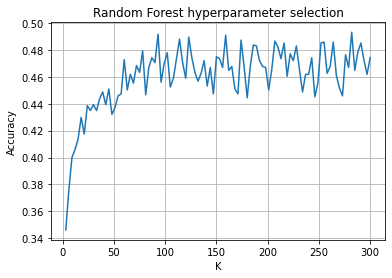



KFold on the best n:
Fold 1
Training Score: 1.000
Test score: 0.476

Confusion matrix:
[[37  4  4  4  6]
 [ 5 25  9  7  7]
 [12  4 21  7 12]
 [ 8  3  8 26  9]
 [13  6  9  7 22]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.49      0.67      0.57        55
      Gilaki       0.60      0.47      0.53        53
     Kurdish       0.41      0.38      0.39        56
        Lori       0.51      0.48      0.50        54
     Turkish       0.39      0.39      0.39        57

    accuracy                           0.48       275
   macro avg       0.48      0.48      0.47       275
weighted avg       0.48      0.48      0.47       275

Fold 2
Training Score: 1.000
Test score: 0.465

Confusion matrix:
[[29  3  9  3 11]
 [ 4 27 10  6  6]
 [ 8  8 27  3 10]
 [ 4  6  6 24 14]
 [ 5  7 11 13 21]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.58      0.53      0.55        55
      Gilaki     

In [24]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[:,:-1])
n_components = 14
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(scaled_data)
data_pca_2 = np.vstack((data_pca.T,dataset[:,-1])).T

forest_score = []
kfold = 5
max_estimators = 300
est_range = np.linspace(3,max_estimators,int(max_estimators/3),endpoint=True)

for i in est_range:
    i = int(i)
    results_forest=[]    
    for fold in range(kfold): 
        train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        forest=RandomForestClassifier(n_estimators=i)
        forest.fit(train_x,train_y)
        results_forest.append(forest.score(test_x,test_y))
    forest_score.append(np.mean(results_forest))
    
print("Best n_estimators is "+str(np.argmax(forest_score)*3+3)+" with the accuarcy "+str(np.max(forest_score)))
plt.plot(est_range, forest_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Random Forest hyperparameter selection")
plt.grid()
plt.savefig("randomForest")
plt.show()        
        
kfold = 5    
print("\n\nKFold on the best n:")
best_n = np.argmax(forest_score)*3+3 
results_forest = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    forest=RandomForestClassifier(n_estimators=best_n)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
    print("Test score: {:.3f}".format(forest.score(test_x,test_y)))  

    y_pred = forest.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best n: "+str(np.mean(results_forest)))        

## SVM with PCA

In [25]:
from sklearn.model_selection import GridSearchCV

data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[:,:-1])
n_components = 14
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(scaled_data)
data_pca_2 = np.vstack((data_pca.T,dataset[:,-1])).T

train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

param_grid = {'C': np.linspace(0, 12, 50, endpoint=True),
              'gamma': np.linspace(0.4, 1, 50, endpoint=True),
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(train_x, train_y)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.42448979591

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 3/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=0.0, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 1/5] END ....C=0.0, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 3/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 2/5] END ....C=0.0, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 3/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=0.24489795918367346, gamma=0.4, kernel=rbf; total time=   0.1s
[CV 2/5] END ...C=0.24489795918367346, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=0.24489795918367346, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=0.24489795918367346, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=0.24489795

[CV 3/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.6204081632653061, kernel=r

[CV 2/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.24489795918367346, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.24489795918367346, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.24489795918367346, gamma=0.8408163265306122, kernel=r

[CV 3/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.4489795918367347, kernel=rbf; to

[CV 3/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.6693877551020408, kernel=rbf; total t

[CV 5/5] END C=0.4897959183673469, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.4897959183673469, gamma=0.889795918367347, kernel=rbf; total time= 

[CV 2/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.5102040816326531, kernel=rbf; tot

[CV 2/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.7306122448979592, kernel=rbf; total t

[CV 3/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.7346938775510203, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.7346938775510203, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.7346938775510203, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.7346938775510203, gamma=0.9510204081632653, kernel=rbf; total time

[CV 4/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.5591836734693878, kernel=rbf; total t

[CV 5/5] END C=0.9795918367346939, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.7795918367346939, kernel=rbf; total t

[CV 1/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9795918367346939, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.9795918367346939, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1.2244897959183674, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=1.2244897959183674, gamma=0.4, kern

[CV 3/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.6204081632653061, kernel=rbf; total t

[CV 3/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2244897959183674, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2244897959183674, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2244897959183674, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2244897959183674, gamma=0.8408163265306122, kernel=rbf; total t

[CV 5/5] END C=1.4693877551020407, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.4489795918367347, kernel=rbf; to

[CV 4/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.6693877551020408, kernel=rbf; total t

[CV 5/5] END C=1.4693877551020407, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time=   0.1s
[CV 2/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time=   0.1s
[CV 4/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.4693877551020407, gamma=0.889795918367347, kernel=rbf; total time= 

[CV 2/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.48571428571428577, kernel=rbf; total time=   0.1s
[CV 1/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.5102040816326531, kernel=rbf; tot

[CV 2/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.7306122448979592, kernel=rbf; total t

[CV 3/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.7142857142857142, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.7142857142857142, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.7142857142857142, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.7142857142857142, gamma=0.9510204081632653, kernel=rbf; total time

[CV 5/5] END C=1.9591836734693877, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.5591836734693878, kernel=rbf; total t

[CV 5/5] END C=1.9591836734693877, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.9591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.7795918367346939, kernel=rbf; total t

[CV 5/5] END C=1.9591836734693877, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.1s
[CV 2/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.9591836734693877, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=1.9591836734693877, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=2.204081632653061, gamm

[CV 1/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.204081632653061, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.204081632653061, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.204081632653061, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.204081632653061, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 5/5] END C=2.4489795918367347, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.4489795918367347, kernel=rbf; to

[CV 5/5] END C=2.4489795918367347, gamma=0.6448979591836734, kernel=rbf; total time=   0.1s
[CV 1/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total time=   0.1s
[CV 3/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total time=   0.1s
[CV 4/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.6693877551020408, kernel=rbf; total t

[CV 5/5] END C=2.4489795918367347, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4489795918367347, gamma=0.889795918367347, kernel=rbf; total time= 

[CV 2/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.48571428571428577, kernel=rbf; total time=   0.1s
[CV 1/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.1s
[CV 2/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.5102040816326531, kernel=rbf; total time=   

[CV 2/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.693877551020408, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.693877551020408, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.693877551020408, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.693877551020408, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[C

[CV 5/5] END C=2.9387755102040813, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.1s
[CV 2/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.5591836734693878, kernel=rbf; total t

[CV 5/5] END C=2.9387755102040813, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.7795918367346939, kernel=rbf; total t

[CV 5/5] END C=2.9387755102040813, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.9387755102040813, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=2.9387755102040813, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=3.183673469387755, gamm

[CV 1/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 3/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.1s
[CV 5/5] END C=3.183673469387755, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.1s
[CV 4/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.183673469387755, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.183673469387755, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.183673469387755, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.183673469387755, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 1/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.1s
[CV 4/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.4612244897959184, kernel=rbf; to

[CV 1/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.6816326530612244, kernel=rbf; total t

[CV 2/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.4285714285714284, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.4285714285714284, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.4285714285714284, gamma=0.9020408163265307, kernel=rbf; total time= 

[CV 4/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.5102040816326531, kernel=rbf; total time=   0.

[CV 1/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s

[CV 3/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.673469387755102, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.673469387755102, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.673469387755102, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.673469387755102, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.673469387755102, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[C

[CV 5/5] END C=3.9183673469387754, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.5714285714285714, kernel=rbf; total t

[CV 1/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.9183673469387754, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.9183673469387754, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.9183673469387754, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.9183673469387754, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.9183673469387754, gamma=0.8040816326530612, kernel=rbf; total t

[CV 1/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=3.9183673469387754, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=4.163265306122449, gamma=0.4, kernel=rbf; total time=   0.1s
[CV 2/5] END .....C=4.163265306122449, gamma=0.4, kernel=rbf; total time=   0.1s
[CV 3/5] END .....C=4.163265306122449, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=4.163265306122449, gamma=0.4, kernel=rbf; total time=   0.1s
[CV 5/5] END .....C=4.163265306122449, gamma=0.4, kernel=rbf; total time=   0.1s
[CV 1/5] END C=4.163265306122449, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5]

[CV 3/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s

[CV 4/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.163265306122449, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.163265306122449, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.163265306122449, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.163265306122449, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.163265306122449, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s

[CV 2/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.47346938775510206, kernel=rbf; total time=   0.

[CV 3/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s

[CV 5/5] END C=4.408163265306122, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 2/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 3/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 4/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.408163265306122, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.408163265306122, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.408163265306122, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.408163265306122, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.408163265306122, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s


[CV 2/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s

[CV 4/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s

[CV 5/5] END C=4.653061224489796, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.653061224489796, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.653061224489796, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.653061224489796, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.653061224489796, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.653061224489796, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 

[CV 1/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.5959183673469388, kernel=rbf; total t

[CV 2/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.1s
[CV 5/5] END C=4.8979591836734695, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.8979591836734695, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.8979591836734695, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.8979591836734695, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.8979591836734695, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.8979591836734695, gamma=0.8163265306122449, kernel=rbf; total t

[CV 2/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=5.142857142857142, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma

[CV 4/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s

[CV 1/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.142857142857142, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.142857142857142, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.142857142857142, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.142857142857142, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.142857142857142, gamma=0.8775510204081632, kernel=rbf; total time=   0.1s

[CV 4/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.48571428571428577, kernel=rbf; total tim

[CV 4/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s

[CV 5/5] END C=5.387755102040816, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.387755102040816, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.387755102040816, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.387755102040816, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.387755102040816, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.387755102040816, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 

[CV 3/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] E

[CV 5/5] END C=5.63265306122449, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 2/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.63265306122449, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.63265306122449, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.63265306122449, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.63265306122449, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.63265306122449, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END ......C=5.63265306122449, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ......C=5.63265306122449, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ......C=5.63265

[CV 5/5] END C=5.877551020408163, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s

[CV 2/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.877551020408163, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.877551020408163, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.877551020408163, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.877551020408163, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.877551020408163, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.122448979591836, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.4489795918367347, kernel=rbf; total time=  

[CV 5/5] END C=6.122448979591836, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s

[CV 1/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.122448979591836, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.122448979591836, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.122448979591836, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.122448979591836, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.122448979591836, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 

[CV 5/5] END C=6.36734693877551, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] 

[CV 2/5] END C=6.36734693877551, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 5/5] END C=6.36734693877551, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.36734693877551, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.36734693877551, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.36734693877551, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.36734693877551, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.36734693877551, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=

[CV 2/5] END C=6.612244897959184, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s

[CV 3/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.612244897959184, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.612244897959184, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.612244897959184, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.612244897959184, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.612244897959184, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s

[CV 1/5] END .....C=6.857142857142857, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=6.857142857142857, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=6.857142857142857, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=6.857142857142857, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=6.857142857142857, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.4244897

[CV 3/5] END C=6.857142857142857, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.857142857142857, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.857142857142857, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.857142857142857, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.857142857142857, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.857142857142857, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.857142857142857, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s

[CV 3/5] END C=7.1020408163265305, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.48571428571428577, kernel=rbf;

[CV 2/5] END C=7.1020408163265305, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.7061224489795919, kernel=rbf; total t

[CV 2/5] END C=7.1020408163265305, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.1020408163265305, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.1020408163265305, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.1020408163265305, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.1020408163265305, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.1020408163265305, gamma=0.926530612244898, kernel=rbf; total tim

[CV 4/5] END C=7.346938775510204, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s

[CV 1/5] END C=7.346938775510204, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s

[CV 3/5] END C=7.346938775510204, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.346938775510204, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.346938775510204, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.346938775510204, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.346938775510204, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.346938775510204, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[C

[CV 5/5] END C=7.591836734693877, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s

[CV 1/5] END C=7.591836734693877, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.591836734693877, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.591836734693877, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.591836734693877, gamma=0.8163265306122449, kernel=rbf; total time=   0.1s
[CV 3/5] END C=7.591836734693877, gamma=0.8163265306122449, kernel=rbf; total time=   0.1s
[CV 4/5] END C=7.591836734693877, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.591836734693877, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.591836734693877, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s

[CV 4/5] END C=7.836734693877551, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.4244897959183674, kernel=rbf; total time=   0.1s
[CV 4/5] END C=7.836734693877551, gamma=0.4244897959183674, kernel=rbf; total time=   0.1s
[CV 5/5] END C=7.836734693877551, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.43673469387755104, kernel=rbf; total time=   

[CV 4/5] END C=7.836734693877551, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s

[CV 5/5] END C=7.836734693877551, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.836734693877551, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.836734693877551, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.836734693877551, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.836734693877551, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.836734693877551, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s

[CV 2/5] END C=8.081632653061224, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.4979591836734694, kernel=rbf; total tim

[CV 3/5] END C=8.081632653061224, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.7061224489795919, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s

[CV 4/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.081632653061224, gamma=0.926530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.081632653061224, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.081632653061224, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.081632653061224, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.081632653061224, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 

[CV 1/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s

[CV 3/5] END C=8.326530612244898, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s

[CV 5/5] END C=8.326530612244898, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.326530612244898, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.326530612244898, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.326530612244898, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.326530612244898, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.326530612244898, gamma=0.9877551020408163, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=8.326530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=8.326530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=8.326530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=8.326530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=8.326530612244898, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=8.571428571428571, gamma=0.4,

[CV 2/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.5959183673469388, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s

[CV 3/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.571428571428571, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.571428571428571, gamma=0.8285714285714285, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.571428571428571, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.571428571428571, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.571428571428571, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s

[CV 5/5] END C=8.816326530612244, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.43673469387755104, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.4489795918367347, kernel=rbf; total time=  

[CV 1/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.6571428571428571, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s

[CV 2/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.8775510204081632, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.816326530612244, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.816326530612244, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.816326530612244, gamma=0.889795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.816326530612244, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.816326530612244, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 

[CV 4/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.48571428571428577, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.4979591836734694, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.5102040816326531, kernel=rbf; total time=   0.

[CV 1/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.7183673469387755, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s

[CV 3/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.9387755102040817, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.061224489795919, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.061224489795919, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.061224489795919, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.061224489795919, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.061224489795919, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[C

[CV 1/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s

[CV 2/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.306122448979592, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.306122448979592, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.306122448979592, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.306122448979592, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.306122448979592, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s

[CV 3/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=9.306122448979592, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=9.551020408163264, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.4122448979591837, kernel=rbf; total t

[CV 4/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.6081632653061224, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s

[CV 1/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.551020408163264, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.551020408163264, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.551020408163264, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.551020408163264, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.551020408163264, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.47346938775510206, kernel=rbf; total time=   

[CV 5/5] END C=9.795918367346939, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s

[CV 1/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.795918367346939, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.795918367346939, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.795918367346939, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.795918367346939, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.795918367346939, gamma=0.926530612244898, kernel=rbf; total time=   0.0s


[CV 3/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.5346938775510204, kernel=rbf; total t

[CV 3/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total time=   0.1s
[CV 4/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.7551020408163265, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.7551020408163265, kernel=rbf; total t

[CV 3/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.040816326530612, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.040816326530612, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.040816326530612, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.040816326530612, gamma=0.9755102040816327, kernel=rbf; total time= 

[CV 5/5] END C=10.285714285714285, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.5836734693877551, kernel=rbf; total t

[CV 1/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.285714285714285, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.285714285714285, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.285714285714285, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.285714285714285, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.285714285714285, gamma=0.8163265306122449, kernel=rbf; total t

[CV 1/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=10.53061224489796, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.4244897

[CV 2/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s

[CV 4/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.8408163265306122, kernel=rbf; total time=   0.1s
[CV 1/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.53061224489796, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.53061224489796, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.53061224489796, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.53061224489796, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.53061224489796, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s

[CV 1/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.48571428571428577, kernel=rbf; t

[CV 5/5] END C=10.775510204081632, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.6938775510204082, kernel=rbf; total t

[CV 1/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.775510204081632, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.775510204081632, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.775510204081632, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.775510204081632, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.775510204081632, gamma=0.926530612244898, kernel=rbf; total ti

[CV 2/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.5102040816326531, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.5346938775510204, kernel=rbf; total t

[CV 2/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.7306122448979592, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total time=   0.1s
[CV 3/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.7428571428571429, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.7551020408163265, kernel=rbf; total time=   0.1s
[CV 2/5] END C=11.020408163265305, gamma=0.7551020408163265, kernel=rbf; total t

[CV 2/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.9510204081632653, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.020408163265305, gamma=0.963265306122449, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.020408163265305, gamma=0.9755102040816327, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.020408163265305, gamma=0.9755102040816327, kernel=rbf; total time= 

[CV 4/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.5591836734693878, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.5714285714285714, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.5836734693877551, kernel=rbf; total time=   0.0s

[CV 1/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.26530612244898, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.26530612244898, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.26530612244898, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.26530612244898, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.26530612244898, gamma=0.8163265306122449, kernel=rbf; total time=   0.0s

[CV 3/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=11.510204081632653, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.4122448979591837, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.4244897959183674, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510

[CV 4/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.6204081632653061, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.6326530612244898, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.6448979591836734, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.6448979591836734, kernel=rbf; total t

[CV 4/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.8408163265306122, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.510204081632653, gamma=0.8530612244897959, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.510204081632653, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.510204081632653, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.510204081632653, gamma=0.8653061224489795, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.510204081632653, gamma=0.8653061224489795, kernel=rbf; total t

[CV 5/5] END C=11.755102040816325, gamma=0.4489795918367347, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.4612244897959184, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.47346938775510206, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.47346938775510206, kernel=rbf; to

[CV 5/5] END C=11.755102040816325, gamma=0.6693877551020408, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.1s
[CV 4/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.1s
[CV 5/5] END C=11.755102040816325, gamma=0.6816326530612244, kernel=rbf; total time=   0.1s
[CV 1/5] END C=11.755102040816325, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.6938775510204082, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.6938775510204082, kernel=rbf; total t

[CV 1/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.1s
[CV 4/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.9020408163265307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.755102040816325, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.755102040816325, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.755102040816325, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.755102040816325, gamma=0.9142857142857143, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.755102040816325, gamma=0.926530612244898, kernel=rbf; total ti

[CV 2/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.5224489795918368, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.5346938775510204, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.5469387755102041, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamm

[CV 5/5] END ...C=12.0, gamma=0.7673469387755102, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.7795918367346939, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.7918367346938775, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.8040816326530612, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.37887505 0.37704857 0.37797011]
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.        ,  0.24489796,  0.48979592,  0.73469388,  0.97959184,
        1.2244898 ,  1.46938776,  1.71428571,  1.95918367,  2.20408163,
        2.44897959,  2.69387755,  2.93877551,  3.18367347,  3.42857143,
        3.67346939,  3.91836735,  4.16326531,  4.40816327,  4.65306122,
        4.89795918,  5.14285714,  5.3877551 ,  5.63265306,  5.87755102,
        6.12244898,  6.36734694,  6.6122449 ,  6...
       0.64489796, 0.65714286, 0.66938776, 0.68163265, 0.69387755,
       0.70612245, 0.71836735, 0.73061224, 0.74285714, 0.75510204,
       0.76734694, 0.77959184, 0.79183673, 0.80408163, 0.81632653,
       0.82857143, 0.84081633, 0.85306122, 0.86530612, 0.87755102,
       0.88979592, 0.90204082, 0.91428571, 0.92653061, 0.93877551,
       0.95102041, 0.96326531, 0.9755102 , 0.9877551 , 1.        ]),
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1.2244897959183674, 'gamma': 0.4, 'kernel': 'rbf'}
SVC(C=1.2244897959183674, gamma=0.4)


In [30]:
svm_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    svm=SVC(C=1.2244897959183674, gamma=0.4)
    svm.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
    print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

    svm_score.append(svm.score(test_x,test_y))
    y_pred = svm.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
print("\nAverage test score:",np.mean(svm_score))     



Fold 1
Training Score: 0.968
Test score: 0.487
[[31  4  5  3 12]
 [ 7 32  3  6  5]
 [ 2 15 22 16  1]
 [ 2 13  7 28  4]
 [ 4  7 15 10 21]]
              precision    recall  f1-score   support

     Bandari       0.67      0.56      0.61        55
      Gilaki       0.45      0.60      0.52        53
     Kurdish       0.42      0.39      0.41        56
        Lori       0.44      0.52      0.48        54
     Turkish       0.49      0.37      0.42        57

    accuracy                           0.49       275
   macro avg       0.50      0.49      0.49       275
weighted avg       0.50      0.49      0.49       275



Fold 2
Training Score: 0.976
Test score: 0.469
[[32  7  3  3 10]
 [ 5 29  5  8  6]
 [ 5 14 24  6  7]
 [ 6 12 10 17  9]
 [ 9  8  8  5 27]]
              precision    recall  f1-score   support

     Bandari       0.56      0.58      0.57        55
      Gilaki       0.41      0.55      0.47        53
     Kurdish       0.48      0.43      0.45        56
        Lori  

## MLP with PCA

In [32]:
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
n_components = 14
pca = PCA(n_components = n_components, whiten=True)
data_pca = pca.fit_transform(dataset[:,:-1])
data_pca_2 = np.vstack((data_pca.T,dataset[:,-1])).T

neural_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    neural=MLPClassifier(activation='relu',max_iter=1000,hidden_layer_sizes=[100,100])
    neural.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
    print("Test score: {:.3f}".format(neural.score(test_x,test_y)))
    neural_score.append(neural.score(test_x,test_y))
    
    y_pred = neural.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    
print("The average accuracy: "+str(np.mean(neural_score))) 



Fold 1
Training Score: 1.000
Test score: 0.393
[[22  6  9  6 12]
 [ 7 21  7  7 11]
 [ 4 10 22 13  7]
 [ 7 10 18 12  7]
 [13  6  4  3 31]]
              precision    recall  f1-score   support

     Bandari       0.42      0.40      0.41        55
      Gilaki       0.40      0.40      0.40        53
     Kurdish       0.37      0.39      0.38        56
        Lori       0.29      0.22      0.25        54
     Turkish       0.46      0.54      0.50        57

    accuracy                           0.39       275
   macro avg       0.39      0.39      0.39       275
weighted avg       0.39      0.39      0.39       275



Fold 2
Training Score: 1.000
Test score: 0.447
[[28  6  5  7  9]
 [ 8 27  3  6  9]
 [ 7  9 22  8 10]
 [ 5 12  9 21  7]
 [11  3  7 11 25]]
              precision    recall  f1-score   support

     Bandari       0.47      0.51      0.49        55
      Gilaki       0.47      0.51      0.49        53
     Kurdish       0.48      0.39      0.43        56
        Lori  

## Working with LDA

## KNN with LDA

Best K is 38 with the accuarcy 0.525090909090909


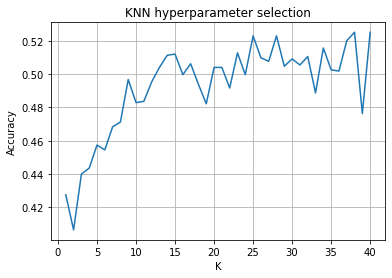



KFold on the best K:
Fold 1
Training Score: 0.550
Test score: 0.484

Confusion matrix:
[[33  4  1  7 10]
 [ 8 16  7 12 10]
 [ 5  2 31  9  9]
 [ 3  4 12 19 16]
 [ 8  3  6  6 34]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.58      0.60      0.59        55
      Gilaki       0.55      0.30      0.39        53
     Kurdish       0.54      0.55      0.55        56
        Lori       0.36      0.35      0.36        54
     Turkish       0.43      0.60      0.50        57

    accuracy                           0.48       275
   macro avg       0.49      0.48      0.48       275
weighted avg       0.49      0.48      0.48       275

Fold 2
Training Score: 0.533
Test score: 0.564

Confusion matrix:
[[41  6  2  2  4]
 [ 7 30  5  5  6]
 [ 9  6 25 10  6]
 [ 3  8 10 24  9]
 [ 4  4  7  7 35]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.64      0.75      0.69        55
      Gilaki     

In [35]:
n_components = 14
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(dataset[:,:-1],dataset[:,-1])
data_lda_2 = np.vstack((data_lda.T,dataset[:,-1])).T

knn_score = []
kfold = 5
K = 40

for i in range(1,K+1):
    results_knn = []   
    for fold in range(kfold): 
        train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        knn = KNeighborsClassifier(n_neighbors=i, p=2)
        knn.fit(train_x,train_y)
        results_knn.append(knn.score(test_x,test_y))
    knn_score.append(np.mean(results_knn))
print("Best K is "+str(np.argmax(knn_score)+1)+" with the accuarcy "+str(np.max(knn_score)))
plt.plot(np.linspace(1,K,K), knn_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN hyperparameter selection")
plt.grid()
plt.savefig("knn")
plt.show()

print("\n\nKFold on the best K:")
best_K = np.argmax(knn_score)+1    
results_knn = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    knn = KNeighborsClassifier(n_neighbors=best_K, p=2)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
    print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

    y_pred = knn.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best K: "+str(np.mean(results_knn)))    

## Gradient Boosting with LDA

In [36]:
n_components = 14
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(dataset[:,:-1],dataset[:,-1])
data_lda_2 = np.vstack((data_lda.T,dataset[:,-1])).T

gradientBoosting_score = []
kfold = 5
for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]
    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=10).fit(train_x, train_y)
    gradientBoosting_score.append(clf.score(test_x, test_y))
    y_pred = clf.predict(test_x)
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("Average test score:",np.mean(gradientBoosting_score))   



Fold 1

Confusion matrix:
[[34  6  6  5  4]
 [10 26  8  6  3]
 [ 6 11 22  7 10]
 [ 5 10  9 18 12]
 [10  7  5  7 28]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.52      0.62      0.57        55
      Gilaki       0.43      0.49      0.46        53
     Kurdish       0.44      0.39      0.42        56
        Lori       0.42      0.33      0.37        54
     Turkish       0.49      0.49      0.49        57

    accuracy                           0.47       275
   macro avg       0.46      0.47      0.46       275
weighted avg       0.46      0.47      0.46       275



Fold 2

Confusion matrix:
[[31  7  4  5  8]
 [ 9 24  5  7  8]
 [ 5  8 23  9 11]
 [ 3 10  3 29  9]
 [ 8  9  1 11 28]]

Classification report:
              precision    recall  f1-score   support

     Bandari       0.55      0.56      0.56        55
      Gilaki       0.41      0.45      0.43        53
     Kurdish       0.64      0.41      0.50        56
        

## Random Forest with LDA

In [ ]:
n_components = 14
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(dataset[:,:-1],dataset[:,-1])
data_lda_2 = np.vstack((data_lda.T,dataset[:,-1])).T

forest_score = []
kfold = 5
max_estimators = 300
est_range = np.linspace(3,max_estimators,int(max_estimators/3),endpoint=True)

for i in est_range:
    i = int(i)
    results_forest=[]    
    for fold in range(kfold): 
        train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
        train_x = train[:,:-1]
        train_y = train[:,-1]
        test_x = test[:,:-1]
        test_y = test[:,-1]

        forest=RandomForestClassifier(n_estimators=i)
        forest.fit(train_x,train_y)
        results_forest.append(forest.score(test_x,test_y))
    forest_score.append(np.mean(results_forest))
    
print("Best n_estimators is "+str(np.argmax(forest_score)*3+3)+" with the accuarcy "+str(np.max(forest_score)))
plt.plot(est_range, forest_score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Random Forest hyperparameter selection")
plt.grid()
plt.savefig("randomForest")
plt.show()        
        
kfold = 5    
print("\n\nKFold on the best n:")
best_n = np.argmax(forest_score)*3+3 
results_forest = []   
for fold in range(kfold):
    print("Fold "+str(fold+1))
    train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    forest=RandomForestClassifier(n_estimators=best_n)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y)) 
    
    print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
    print("Test score: {:.3f}".format(forest.score(test_x,test_y)))  

    y_pred = forest.predict(test_x)
    print("\nConfusion matrix:")
    print(confusion_matrix(test_y, y_pred))
    print("\nClassification report:")
    print(classification_report(test_y, y_pred))
    
print("The average accuracy for the best n: "+str(np.mean(results_forest)))        

## SVM with LDA

In [37]:
from sklearn.model_selection import GridSearchCV

n_components = 14
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(dataset[:,:-1],dataset[:,-1])
data_lda_2 = np.vstack((data_lda.T,dataset[:,-1])).T

train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

param_grid = {'C': np.linspace(0, 12, 40, endpoint=True),
              'gamma': np.linspace(0.4, 1, 40, endpoint=True),
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(train_x, train_y)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV 1/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.0, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.430769230769

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 4/5] END ....C=0.0, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 4/5] END ....C=0.0, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "Q:\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
Q:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

[CV 2/5] END .....C=0.0, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=0.0, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=0.0, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=0.0, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.0, gamm

[CV 2/5] END ....C=0.3076923076923077, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.3076923076923077, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.3076923076923077, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.3076923076923077, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.3076923076923077, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.3076923076923077, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.3076923076923077, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.3076923076923077, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.3076923076923077, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.3076923076923077, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.3076923076923077, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.307692307692307

[CV 3/5] END C=0.3076923076923077, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.3076923076923077, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.3076923076923077, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.3076923076923077, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.3076923076923077, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.3076923076923077, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.3076923076923077, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.3076923076923077, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.3076923076923077, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.3076923076923077, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.3076923076923077, gamma=0.9076923076923077, kernel=rbf; total t

[CV 4/5] END C=0.6153846153846154, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.6153846153846154, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.6153846153846154, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.6153846153846154, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.6153846153846154, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.6153846153846154, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.6153846153846154, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.6153846153846154, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.6153846153846154, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.6153846153846154, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.6153846153846154, gamma=0.5692307692307692, kernel=rbf; total t

[CV 2/5] END C=0.6153846153846154, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.6153846153846154, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.6153846153846154, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.6153846153846154, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.6153846153846154, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.6153846153846154, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.6153846153846154, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.6153846153846154, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.6153846153846154, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.6153846153846154, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.6153846153846154, gamma=0.8615384615384616, kernel=rbf; total t

[CV 4/5] END C=0.9230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9230769230769231, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9230769230769231, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9230769230769231, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9230769230769231, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9230769230769231, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9230769230769231, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9230769230769231, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9230769230769231, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9230769230769231, gamma=0.5230769230769231, kernel=rbf; total

[CV 1/5] END C=0.9230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=0.9230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=0.9230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=0.9230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.9230769230769231, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=0.9230769230769231, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=0.9230769230769231, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=0.9230769230769231, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=0.9230769230769231, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 1/5] END C=0.9230769230769231, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=0.9230769230769231, gamma=0.

[CV 4/5] END C=1.2307692307692308, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2307692307692308, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2307692307692308, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2307692307692308, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2307692307692308, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2307692307692308, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2307692307692308, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2307692307692308, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2307692307692308, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2307692307692308, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2307692307692308, gamma=0.47692307692307695, kernel=rbf

[CV 4/5] END C=1.2307692307692308, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2307692307692308, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2307692307692308, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2307692307692308, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2307692307692308, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2307692307692308, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.2307692307692308, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.2307692307692308, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.2307692307692308, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.2307692307692308, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.2307692307692308, gamma=0.7538461538461538, kernel=rbf; total t

[CV 2/5] END ....C=1.5384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=1.5384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=1.5384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=1.5384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.5384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.5384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.5384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.5384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.5384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.538461538461538

[CV 4/5] END C=1.5384615384615385, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.5384615384615385, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.5384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.5384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.5384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.5384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.5384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.5384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.5384615384615385, gamma=0.7076923076923076, kernel=rbf; total tim

[CV 1/5] END C=1.5384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.5384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.5384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.5384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.5384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.5384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.5384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.5384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.5384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1.5384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s

[CV 4/5] END C=1.8461538461538463, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.8461538461538463, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.8461538461538463, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.8461538461538463, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.8461538461538463, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.8461538461538463, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.8461538461538463, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.8461538461538463, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.8461538461538463, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.8461538461538463, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.8461538461538463, gamma=0.6615384615384615, kernel=rbf; total t

[CV 4/5] END C=1.8461538461538463, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.8461538461538463, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.8461538461538463, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.8461538461538463, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.8461538461538463, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.8461538461538463, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=1.8461538461538463, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=1.8461538461538463, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=1.8461538461538463, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=1.8461538461538463, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=1.8461538461538463, gamma=0.9384615384615385, kernel=rbf; total time= 

[CV 2/5] END C=2.153846153846154, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.153846153846154, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.153846153846154, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.153846153846154, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=2.153846153846154, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=2.153846153846154, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=2.153846153846154, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=2.153846153846154, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=2.153846153846154, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.153846153846154, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.153846153846154, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.153846153846154, gamma=0.6153846

[CV 5/5] END C=2.153846153846154, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.153846153846154, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.153846153846154, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.153846153846154, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.153846153846154, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.153846153846154, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.153846153846154, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.153846153846154, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.153846153846154, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.153846153846154, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.153846153846154, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s

[CV 3/5] END C=2.4615384615384617, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4615384615384617, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4615384615384617, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4615384615384617, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4615384615384617, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4615384615384617, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4615384615384617, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4615384615384617, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4615384615384617, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4615384615384617, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4615384615384617, gamma=0.5692307692307692, kernel=rbf; total t

[CV 1/5] END C=2.4615384615384617, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4615384615384617, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4615384615384617, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4615384615384617, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4615384615384617, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4615384615384617, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.4615384615384617, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.4615384615384617, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.4615384615384617, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.4615384615384617, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.4615384615384617, gamma=0.8615384615384616, kernel=rbf; total t

[CV 2/5] END C=2.769230769230769, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.769230769230769, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.769230769230769, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.769230769230769, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.769230769230769, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.769230769230769, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.769230769230769, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.769230769230769, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.769230769230769, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.769230769230769, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.769230769230769, gamma=0.5230769230769231, kernel=rbf; total time=   

[CV 4/5] END C=2.769230769230769, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.769230769230769, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=2.769230769230769, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.769230769230769, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.769230769230769, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.769230769230769, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.769230769230769, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=2.769230769230769, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=2.769230769230769, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=2.769230769230769, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=2.769230769230769, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=2.769230769230769, 

[CV 2/5] END C=3.076923076923077, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.076923076923077, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.076923076923077, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.076923076923077, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.076923076923077, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.076923076923077, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.076923076923077, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.076923076923077, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.076923076923077, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.076923076923077, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.076923076923077, gamma=0.47692307692307695, kernel=rbf; total time=

[CV 5/5] END C=3.076923076923077, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.076923076923077, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.076923076923077, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.076923076923077, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.076923076923077, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.076923076923077, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s

[CV 3/5] END .....C=3.384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=3.384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=3.384615384615385, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.384615384615385, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.384615384615

[CV 1/5] END C=3.384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.384615384615385, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s

[CV 4/5] END C=3.384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.384615384615385, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=3.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=3.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=3.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=3.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=3.384615384615385, 

[CV 2/5] END C=3.6923076923076925, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.6923076923076925, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.6923076923076925, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.6923076923076925, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.6923076923076925, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.6923076923076925, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.6923076923076925, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.6923076923076925, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.6923076923076925, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.6923076923076925, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.6923076923076925, gamma=0.676923076923077, kernel=rbf; total tim

[CV 3/5] END C=3.6923076923076925, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.6923076923076925, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.6923076923076925, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.6923076923076925, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.6923076923076925, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.6923076923076925, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=3.6923076923076925, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=3.6923076923076925, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=3.6923076923076925, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=3.6923076923076925, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=3.6923076923076925, gamma=0.9538461538461538, kernel=rbf; total time

[CV 3/5] END ....C=4.0, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.0, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.0, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=4.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=4.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.0, gamm

[CV 5/5] END .....C=4.0, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=4.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=4.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=4.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=4.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=4.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=4.0, gamm

[CV 5/5] END .....C=4.307692307692308, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.307692307692308, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.307692307692308, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.307692307692308, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.307692307692308, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.307692307692308, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] 

[CV 3/5] END C=4.307692307692308, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.307692307692308, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.307692307692308, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.307692307692308, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.307692307692308, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.307692307692308, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.307692307692308, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.307692307692308, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[C

[CV 1/5] END C=4.615384615384616, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.615384615384616, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.615384615384616, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.615384615384616, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.615384615384616, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.615384615384616, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.615384615384616, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.615384615384616, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.615384615384616, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.615384615384616, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=4.615384615384616, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 2/5] 

[CV 4/5] END C=4.615384615384616, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.615384615384616, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.615384615384616, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.615384615384616, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.615384615384616, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.615384615384616, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.615384615384616, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.615384615384616, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.615384615384616, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.615384615384616, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.615384615384616, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s

[CV 1/5] END C=4.923076923076923, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.923076923076923, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.923076923076923, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.923076923076923, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.923076923076923, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s

[CV 3/5] END .....C=4.923076923076923, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=4.923076923076923, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=4.923076923076923, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=4.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=4.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=4.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=4.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=4.923076923076

[CV 5/5] END C=5.230769230769231, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.230769230769231, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.230769230769231, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.230769230769231, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.230769230769231, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.230769230769231, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.1s
[CV 4/5] END C=5.230769230769231, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.230769230769231, gamma=0.49230769230769234, kernel=rbf; total t

[CV 2/5] END C=5.230769230769231, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.230769230769231, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.230769230769231, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.230769230769231, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.230769230769231, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.230769230769231, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.230769230769231, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.230769230769231, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.230769230769231, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.230769230769231, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s

[CV 5/5] END C=5.538461538461538, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.538461538461538, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.538461538461538, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.538461538461538, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.538461538461538, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.538461538461538, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s

[CV 3/5] END C=5.538461538461538, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.538461538461538, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.538461538461538, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.538461538461538, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.538461538461538, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.538461538461538, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.538461538461538, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.538461538461538, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s

[CV 1/5] END .....C=5.538461538461538, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=5.538461538461538, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=5.538461538461538, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=5.538461538461538, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=5.538461538461538, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=5.846153846153847, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=5.846153846153847, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=5.846153846153847, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=5.846153846153847, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=5.846153846153847, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5]

[CV 4/5] END C=5.846153846153847, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.846153846153847, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.846153846153847, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.846153846153847, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.846153846153847, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.846153846153847, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.846153846153847, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 

[CV 2/5] END C=5.846153846153847, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.846153846153847, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.846153846153847, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.846153846153847, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=5.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=5.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=5.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=5.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=5.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.153846153846154, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.153846153846154, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.153846153846154, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.153846153846154, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.153846153846154, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.153846153846154, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.153846153846154, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.153846153846154, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.153846153846154, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.153846153846154, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.153846153846154, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s

[CV 3/5] END C=6.153846153846154, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.153846153846154, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.153846153846154, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.153846153846154, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.153846153846154, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.153846153846154, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.153846153846154, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.153846153846154, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.153846153846154, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.153846153846154, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.153846153846154, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 

[CV 5/5] END C=6.461538461538462, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=6.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=6.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=6.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=6.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=6.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.461538461538462, gamma=0.6153846

[CV 2/5] END C=6.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.461538461538462, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.461538461538462, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s

[CV 5/5] END C=6.76923076923077, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 1/5] E

[CV 3/5] END C=6.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=6.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=6.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=6.76923076923077, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 2/5] END C=6.76923076923077, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 3/5] END C=6.76923076923077, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 4/5] E

[CV 1/5] END C=7.0769230769230775, gamma=0.49230769230769234, kernel=rbf; total time=   0.1s
[CV 2/5] END C=7.0769230769230775, gamma=0.49230769230769234, kernel=rbf; total time=   0.1s
[CV 3/5] END C=7.0769230769230775, gamma=0.49230769230769234, kernel=rbf; total time=   0.1s
[CV 4/5] END C=7.0769230769230775, gamma=0.49230769230769234, kernel=rbf; total time=   0.1s
[CV 5/5] END C=7.0769230769230775, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.0769230769230775, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.0769230769230775, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.0769230769230775, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.0769230769230775, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.0769230769230775, gamma=0.5076923076923077, kernel=rbf; total time=   0.1s
[CV 1/5] END C=7.0769230769230775, gamma=0.5230769230769231, kernel=rbf; to

[CV 2/5] END C=7.0769230769230775, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.0769230769230775, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.0769230769230775, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.0769230769230775, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.0769230769230775, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.0769230769230775, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.0769230769230775, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.0769230769230775, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.0769230769230775, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=7.0769230769230775, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=7.0769230769230775, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 3/5] E

[CV 5/5] END C=7.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.384615384615385, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.384615384615385, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.384615384615385, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.384615384615385, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.384615384615385, gamma=0.46153846153846156, kernel=rbf; total time=  

[CV 2/5] END C=7.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.384615384615385, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.384615384615385, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s

[CV 5/5] END .....C=7.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=7.6923076923076925, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=7.6923076923076925, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=7.6923076923076925, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=7.6923076923076925, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=7.6923076923076925, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.6923076923076925, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.6923076923076925, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.6923076923076925, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.6923076923076925, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.43076923076

[CV 2/5] END C=7.6923076923076925, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.6923076923076925, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.6923076923076925, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.6923076923076925, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.6923076923076925, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.6923076923076925, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.6923076923076925, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.6923076923076925, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.6923076923076925, gamma=0.7076923076923076, kernel=rbf; total time=

[CV 4/5] END C=7.6923076923076925, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.6923076923076925, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.6923076923076925, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.6923076923076925, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.6923076923076925, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=7.6923076923076925, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=7.6923076923076925, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=7.6923076923076925, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=7.6923076923076925, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=7.6923076923076925, gamma=0.9846153846153846, kernel=rbf; total t

[CV 4/5] END ....C=8.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=8.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=8.0, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=8.0, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=8.0, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=8.0, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=8.0, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=8.0, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=8.0, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=8.0, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=8.0, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=8.0, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=8.0, gamm

[CV 2/5] END ....C=8.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=8.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=8.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=8.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=8.0, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=8.0, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=8.0, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=8.0, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=8.0, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=8.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=8.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=8.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END C=8.307692307692308, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.307692307692308, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.307692307692308, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.307692307692308, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.307692307692308, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.307692307692308, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.307692307692308, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.307692307692308, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.307692307692308, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.307692307692308, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.307692307692308, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s

[CV 2/5] END C=8.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.307692307692308, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.307692307692308, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.307692307692308, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.307692307692308, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.307692307692308, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.307692307692308, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.307692307692308, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.307692307692308, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV

[CV 4/5] END C=8.615384615384617, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.615384615384617, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=8.615384615384617, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=8.615384615384617, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=8.615384615384617, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=8.615384615384617, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=8.615384615384617, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.615384615384617, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.615384615384617, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.615384615384617, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.615384615384617, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.615384615384617, gamma=0.6153846

[CV 1/5] END C=8.615384615384617, gamma=0.8769230769230769, kernel=rbf; total time=   0.1s
[CV 2/5] END C=8.615384615384617, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.615384615384617, gamma=0.8769230769230769, kernel=rbf; total time=   0.1s
[CV 4/5] END C=8.615384615384617, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.615384615384617, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.615384615384617, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.615384615384617, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.615384615384617, gamma=0.8923076923076922, kernel=rbf; total time=   0.1s
[CV 4/5] END C=8.615384615384617, gamma=0.8923076923076922, kernel=rbf; total time=   0.1s
[CV 5/5] END C=8.615384615384617, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.615384615384617, gamma=0.9076923076923077, kernel=rbf; total time=   0.0s

[CV 3/5] END C=8.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.923076923076923, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.923076923076923, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.923076923076923, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.923076923076923, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.923076923076923, gamma=0.5692307692307692, kernel=rbf; total time=   0.0s

[CV 5/5] END C=8.923076923076923, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.923076923076923, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.923076923076923, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.923076923076923, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.923076923076923, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.923076923076923, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.923076923076923, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.230769230769232, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.230769230769232, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.230769230769232, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.230769230769232, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.230769230769232, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.230769230769232, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.230769230769232, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.230769230769232, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.230769230769232, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.230769230769232, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.230769230769232, gamma=0.5230769230769231, kernel=rbf; total time=   0.

[CV 2/5] END C=9.230769230769232, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.230769230769232, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.230769230769232, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.230769230769232, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=9.230769230769232, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=9.230769230769232, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=9.230769230769232, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=9.230769230769232, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=9.230769230769232, gamma=0.8, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.230769230769232, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.230769230769232, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.230769230769232, gamma=0.8153846

[CV 5/5] END C=9.538461538461538, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.538461538461538, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.538461538461538, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.538461538461538, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.538461538461538, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.538461538461538, gamma=0.46153846153846156, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.538461538461538, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.538461538461538, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.538461538461538, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.538461538461538, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.538461538461538, gamma=0.47692307692307695, kernel=rbf; total ti

[CV 3/5] END C=9.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.538461538461538, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.538461538461538, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.538461538461538, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.538461538461538, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.538461538461538, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.538461538461538, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.538461538461538, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.538461538461538, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.538461538461538, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s

[CV 2/5] END C=9.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.846153846153847, gamma=0.4153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.846153846153847, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.846153846153847, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.846153846153847, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.846153846153847, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.846153846153847, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.846153846153847, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.846153846153847, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s

[CV 4/5] END C=9.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.846153846153847, gamma=0.6923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.846153846153847, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.846153846153847, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.846153846153847, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.846153846153847, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.846153846153847, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.846153846153847, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.846153846153847, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.846153846153847, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.846153846153847, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s

[CV 5/5] END C=9.846153846153847, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=9.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=9.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=9.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=9.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=9.846153846153847, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=9.846153846153847, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END .....C=9.846153846153847, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END .....C=9.846153846153847, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END .....C=9.846153846153847, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END .....C=9.846153846153847, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.153846153846155, gamma=0.4,

[CV 2/5] END C=10.153846153846155, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.153846153846155, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.153846153846155, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.153846153846155, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.153846153846155, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.153846153846155, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.153846153846155, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.153846153846155, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.153846153846155, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.153846153846155, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.153846153846155, gamma=0.676923076923077, kernel=rbf; total tim

[CV 2/5] END C=10.153846153846155, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.153846153846155, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.153846153846155, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.153846153846155, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.153846153846155, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.153846153846155, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.153846153846155, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.153846153846155, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.153846153846155, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.153846153846155, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.153846153846155, gamma=0.9538461538461538, kernel=rbf; total time=

[CV 3/5] END C=10.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.461538461538462, gamma=0.5846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=10.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=10.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=10.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=10.461538461538462, gamma=0.6, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.461538461538462, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.461538461538462, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.461538461538462, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.461538461538462, gamma=0.

[CV 4/5] END C=10.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.461538461538462, gamma=0.8615384615384616, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.461538461538462, gamma=0.8769230769230769, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.461538461538462, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.461538461538462, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.461538461538462, gamma=0.8923076923076922, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.461538461538462, gamma=0.8923076923076922, kernel=rbf; total t

[CV 5/5] END C=10.76923076923077, gamma=0.5230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.76923076923077, gamma=0.5384615384615384, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.76923076923077, gamma=0.5538461538461539, kernel=rbf; total time=   0.0s

[CV 2/5] END C=10.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.76923076923077, gamma=0.8153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END C=10.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END C=10.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END C=10.76923076923077, gamma=0.8307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END C=10.76923076923077, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s
[CV 2/5] END C=10.76923076923077, gamma=0.8461538461538461, kernel=rbf; total time=   0.0s

[CV 4/5] END C=11.076923076923077, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.076923076923077, gamma=0.47692307692307695, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.076923076923077, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.076923076923077, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.076923076923077, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.076923076923077, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.076923076923077, gamma=0.49230769230769234, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.076923076923077, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.076923076923077, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.076923076923077, gamma=0.5076923076923077, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.076923076923077, gamma=0.5076923076923077, kernel=rbf; 

[CV 5/5] END C=11.076923076923077, gamma=0.7538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.076923076923077, gamma=0.7692307692307692, kernel=rbf; total time=   0.1s
[CV 2/5] END C=11.076923076923077, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.076923076923077, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.076923076923077, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.076923076923077, gamma=0.7692307692307692, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.076923076923077, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.076923076923077, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.076923076923077, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.076923076923077, gamma=0.7846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.076923076923077, gamma=0.7846153846153846, kernel=rbf; total t

[CV 1/5] END C=11.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.384615384615385, gamma=0.4307692307692308, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.384615384615385, gamma=0.4461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.384615384615385, gamma=0.46153846153846156, kernel=rbf; total 

[CV 2/5] END C=11.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.384615384615385, gamma=0.7076923076923076, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.384615384615385, gamma=0.7230769230769231, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.384615384615385, gamma=0.7384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.384615384615385, gamma=0.7384615384615385, kernel=rbf; total t

[CV 2/5] END C=11.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.384615384615385, gamma=0.9846153846153846, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=11.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=11.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=11.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 4/5] END ....C=11.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 5/5] END ....C=11.384615384615385, gamma=1.0, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=11.692307692307693, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 2/5] END ....C=11.692307692307693, gamma=0.4, kernel=rbf; total time=   0.0s
[CV 3/5] END ....C=11.692307692307693, gamma=0.4, kernel=rbf; tot

[CV 3/5] END C=11.692307692307693, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.692307692307693, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.692307692307693, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.692307692307693, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.692307692307693, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.692307692307693, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.692307692307693, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.692307692307693, gamma=0.6615384615384615, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.692307692307693, gamma=0.676923076923077, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.692307692307693, gamma=0.676923076923077, kernel=rbf; total time=   0.1s
[CV 3/5] END C=11.692307692307693, gamma=0.676923076923077, kernel=rbf; total time

[CV 5/5] END C=11.692307692307693, gamma=0.923076923076923, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.692307692307693, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.692307692307693, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.692307692307693, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.692307692307693, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.692307692307693, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END C=11.692307692307693, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END C=11.692307692307693, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END C=11.692307692307693, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END C=11.692307692307693, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END C=11.692307692307693, gamma=0.9538461538461538, kernel=rbf; total ti

[CV 4/5] END ...C=12.0, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.6153846153846154, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.6307692307692307, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.6461538461538462, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamm

[CV 3/5] END ...C=12.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.9384615384615385, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamma=0.9538461538461538, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=12.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 2/5] END ...C=12.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 3/5] END ...C=12.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 4/5] END ...C=12.0, gamma=0.9692307692307692, kernel=rbf; total time=   0.0s
[CV 5/5] END ...C=12.0, gamm

Q:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.41804068 0.41985886 0.41802823]
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.        ,  0.30769231,  0.61538462,  0.92307692,  1.23076923,
        1.53846154,  1.84615385,  2.15384615,  2.46153846,  2.76923077,
        3.07692308,  3.38461538,  3.69230769,  4.        ,  4.30769231,
        4.61538462,  4.92307692,  5.23076923,  5.53846154,  5.84615385,
        6.15384615,  6.46153846,  6.76923077,  7.07692308,  7.38461538,
        7.69230769,  8.        ,  8.30769231,  8.61538462,  8.9...
       0.47692308, 0.49230769, 0.50769231, 0.52307692, 0.53846154,
       0.55384615, 0.56923077, 0.58461538, 0.6       , 0.61538462,
       0.63076923, 0.64615385, 0.66153846, 0.67692308, 0.69230769,
       0.70769231, 0.72307692, 0.73846154, 0.75384615, 0.76923077,
       0.78461538, 0.8       , 0.81538462, 0.83076923, 0.84615385,
       0.86153846, 0.87692308, 0.89230769, 0.90769231, 0.92307692,
       0.93846154, 0.95384615, 0.96923077, 0.98461538, 1.        ]),
                         'kernel': ['rbf']

In [38]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.6153846153846154, 'gamma': 0.47692307692307695, 'kernel': 'rbf'}
SVC(C=0.6153846153846154, gamma=0.47692307692307695)


In [44]:
svm_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_pca_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    svm=SVC(C=0.61, gamma=0.47)
    svm.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
    print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

    svm_score.append(svm.score(test_x,test_y))
    y_pred = svm.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
print("\nAverage test score:",np.mean(svm_score))    



Fold 1
Training Score: 0.959
Test score: 0.396
[[15  1  8 13 18]
 [ 5 11  6 27  4]
 [ 3  2 25 20  6]
 [ 2  5 11 29  7]
 [ 2  2  7 17 29]]
              precision    recall  f1-score   support

     Bandari       0.56      0.27      0.37        55
      Gilaki       0.52      0.21      0.30        53
     Kurdish       0.44      0.45      0.44        56
        Lori       0.27      0.54      0.36        54
     Turkish       0.45      0.51      0.48        57

    accuracy                           0.40       275
   macro avg       0.45      0.39      0.39       275
weighted avg       0.45      0.40      0.39       275



Fold 2
Training Score: 0.955
Test score: 0.429
[[17  1 19  6 12]
 [ 0 16 28  7  2]
 [ 3  0 39 10  4]
 [ 1  6 26 18  3]
 [ 2  4 14  9 28]]
              precision    recall  f1-score   support

     Bandari       0.74      0.31      0.44        55
      Gilaki       0.59      0.30      0.40        53
     Kurdish       0.31      0.70      0.43        56
        Lori  

## MLP with LDA

In [46]:
n_components = 14
data = pandas.read_csv('music_dataset3.csv',index_col=False)
dataset = np.array(data)
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(dataset[:,:-1],dataset[:,-1])
data_lda_2 = np.vstack((data_lda.T,dataset[:,-1])).T

neural_score = []
kfold = 5

for fold in range(kfold): 
    print("\n\nFold",fold+1)
    train, test = train_test_split(data_lda_2, test_size = 0.2, stratify=dataset[:,-1])
    train_x = train[:,:-1]
    train_y = train[:,-1]
    test_x = test[:,:-1]
    test_y = test[:,-1]

    neural=MLPClassifier(activation='relu',max_iter=1000,hidden_layer_sizes=[100,100])
    neural.fit(train_x,train_y)
    print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
    print("Test score: {:.3f}".format(neural.score(test_x,test_y)))
    neural_score.append(neural.score(test_x,test_y))
    
    y_pred = neural.predict(test_x)

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    
print("The average accuracy: "+str(np.mean(neural_score))) 



Fold 1
Training Score: 0.856
Test score: 0.469
[[35  5  4  5  6]
 [ 6 23 11  4  9]
 [ 9  7 26 11  3]
 [ 1 11 11 19 12]
 [ 4 10  9  8 26]]
              precision    recall  f1-score   support

     Bandari       0.64      0.64      0.64        55
      Gilaki       0.41      0.43      0.42        53
     Kurdish       0.43      0.46      0.44        56
        Lori       0.40      0.35      0.38        54
     Turkish       0.46      0.46      0.46        57

    accuracy                           0.47       275
   macro avg       0.47      0.47      0.47       275
weighted avg       0.47      0.47      0.47       275



Fold 2
Training Score: 0.860
Test score: 0.440
[[37  8  2  1  7]
 [11 16  8  8 10]
 [ 5  5 23 14  9]
 [ 5 10  9 22  8]
 [ 9  5  7 13 23]]
              precision    recall  f1-score   support

     Bandari       0.55      0.67      0.61        55
      Gilaki       0.36      0.30      0.33        53
     Kurdish       0.47      0.41      0.44        56
        Lori  

Q:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Correlation Between Features

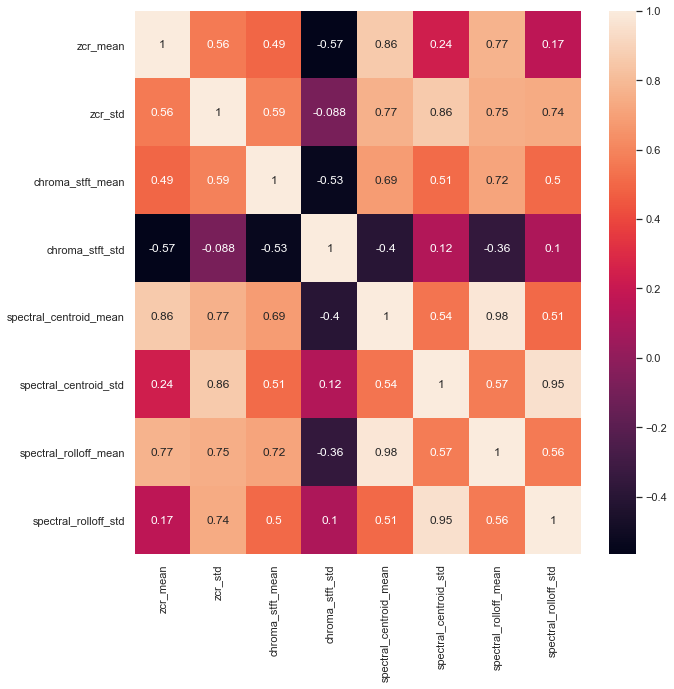

In [291]:
import seaborn as sns

df_small = data.iloc[:,26:]
correlation_mat = df_small.corr()
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(correlation_mat, annot = True)
plt.show()

## Convert Classes into Numbers

In [350]:
dialect = {'Bandari':1,'Gilaki':2,'Kurdish':3,'Lori':4,'Turkish':5}
data.Dialect = [dialect[item] for item in data.Dialect]

## Feature Reduction - Select KBest

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif 

data_Kbest = pd.read_csv('music_dataset3.csv')
X = data_Kbest.iloc[:,:-1]
y = data_Kbest.iloc[:,-1] 

features_selected = 19
bestfeatures = SelectKBest(score_func=f_classif, k=features_selected)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
largest = featureScores.nlargest(features_selected,'Score')
print(largest)

best_features = np.array(largest.Specs)
clear_data = pd.concat([data_Kbest[best_features],data_Kbest.Dialect], axis=1)

from sklearn.model_selection import train_test_split
import numpy as np 
dialects = ["Bandari", "Gilaki","Kurdish","Lori","Turkish"]

clear_dataset = np.array(clear_data)
train, test = train_test_split(clear_dataset, test_size = 0.2, random_state=2, stratify=clear_dataset[:,-1])
x_train_Kbest = train[:,:-1]
y_train_Kbest = train[:,-1]
x_test_Kbest = test[:,:-1]
y_test_Kbest = test[:,-1]

                      Specs      Score
28         chroma_stft_mean  50.503213
32    spectral_rolloff_mean  49.896104
36  spectral_bandwidth_mean  48.470724
30   spectral_centroid_mean  37.388292
34   spectral_contrast_mean  33.630572
2                mfcc2_mean  29.698171
0                mfcc1_mean  25.121723
31    spectral_centroid_std  23.080348
35    spectral_contrast_std  22.250841
27                  zcr_std  20.692317
20              mfcc11_mean  20.358888
24              mfcc13_mean  18.201360
26                 zcr_mean  17.292279
33     spectral_rolloff_std  17.205013
22              mfcc12_mean  15.831585
8                mfcc5_mean  15.415744
14               mfcc8_mean  15.019580
5                 mfcc3_std  10.717810
16               mfcc9_mean   9.750868
